# Разведочный анализ данных:
`Разведочный анализ данных (Exploratory Data Analysis, EDA)` — это начальный процесс анализа данных, целью которого является понимание структуры и основных характеристик датасета. EDA помогает исследовать данные, выявлять важные паттерны, аномалии, пропуски и зависимости между переменными. Основная задача — подготовить данные для дальнейшего построения моделей.

**EDA включает**:

- Описание основных статистических характеристик данных.
- Визуализацию распределения переменных.
- Анализ взаимосвязей между переменными.
- Поиск пропусков и выбросов.
- Принятие решений по обработке данных для моделирования.
- 
**Основная цель EDA** — получить интуитивное понимание данных и выявить важные особенности (features), которые могут влиять на целевую переменную (target).

**Features (Признаки)** — это независимые переменные (входные данные), которые используются для предсказания целевой переменной. Признаки могут быть различной природы: числовые (возраст, зарплата) или категориальные (пол, класс билета).

**Target (Целевая переменная)** — это зависимая переменная, которую мы пытаемся предсказать с помощью модели машинного обучения. Целевая переменная может быть классификационной (например, бинарная переменная "выжил/не выжил") или регрессионной (например, числовое значение цены дома).

Признаки: возраст (`Age`), пол (`Sex`), класс (`Pclass`), стоимость билета (`Fare`), и т.д.

Целевая переменная: выживание пассажира (`Survived`).

Мы будем рассматривать EDA на примере датасета `titanic`

**Описание датасета:**

1. `PassengerId`: Уникальный идентификатор пассажира. Этот столбец служит для обозначения каждой записи, и его значения не имеют аналитической ценности.

2. `Survived`: Целевая переменная, показывающая, выжил ли пассажир.
-  0 — пассажир не выжил.
 - 1 — пассажир выжил.
    
3. `Pclass`: Класс обслуживания пассажира (социально-экономический статус).
 - 1 — Первый класс.
 - 2 — Второй класс.
 - 3 — Третий класс.

4. `Name`: Имя пассажира, которое включает титул (например, Mr., Mrs., Miss). 

5. `Sex`: Пол пассажира. Возможные значения — "male" (мужчина) или "female" (женщина). 

6. `Age`: Возраст пассажира. 

7. `SibSp`: Количество братьев/сестер или супругов на борту. 

8. `Parch`: Количество родителей или детей пассажира на борту. 

9. `Ticket`: Номер билета. 

10. `Fare`: Стоимость билета, уплаченная пассажиром. 

11. `Cabin`: Номер каюты пассажира. 

12. `Embarked`: Порт, в котором пассажир сел на борт.
- C — Cherbourg.
- Q — Queenstown.
- S — Southampton.

## Шаг 1: Загрузка данных и начальная информация о DataFrame

In [1]:
import pandas as pd

# Загрузка данных Titanic
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [2]:
# Смотрим на наш DataFrame (далее по тексту df)
# Смотрим на 5 первых строк
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Смотрим на 5 последних строк
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Для чего это нужно?**

Чтобы первоначально оценить визуально структуру нашего датафрейма и понять что именно в нем содержится. Также, посмотрев конечные 5 строк, мы как минимум можем увидеть сколько наблюдений (строк) содержит наш df.

Разумеется, это можно сделать и иначе, сейчас посмотрим как!

In [4]:
# Смотрим размерность нашего df
titanic.shape

(891, 12)

**Что мы получаем из этих цифр?**
- первая цифра в выводе - означает количество строк в нашем df (в нашем случае это 891 строка).
- вторая цифра - означает количество столбцов в нашем df (в нашем случае это 12 столбцов).

In [5]:
# Смотрим информацию о нашем df
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Из этой информации мы уже можем получить некоторые важные сведения для нас, как для **аналитиков данных**, а именно:
- узнать какие типы данных у нас есть: у нас есть данные int (целочисленные значения), float (числа с плавающей точкой) и object (строки). 
- посмотреть в каких строках у нас есть пропуски (это можно определить по столбцу Non-Null Count и там где значение будет отличаться от общего количества нашего строк, т.е. от 891, будет означать что этот столбец имеет пропуски. Указанное число, означает строк данных в столбце имеется.).
- также можно узнать типы наших данных и сколько столбцов имеют те или иные типы (в нашем случае: float64(2), int64(5), object(5))
- Узнать размерность нашего датафрейма (в нашем случае: RangeIndex: 891 и 12 columns)
- Сколько памяти занимает наш df

In [6]:
# Посмотреть на статистическое описание числовых данных в df
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Метод `describe()` автоматически вычисляет следующие метрики для всех числовых столбцов:
- `count` — количество ненулевых значений в каждом столбце.
- `mean` — среднее значение.
- `std` — стандартное отклонение.
- `min` — минимальное значение.
- `25%` — первый квартиль (25-й процентиль).
- `50%` — медиана (50-й процентиль).
- `75%` — третий квартиль (75-й процентиль).
- `max` — максимальное значение.

Важно помнить, что таким образом мы смотрим на статистическое описание только **числовых данных**, но в нашем случае есть и данные типы object!

## Шаг 2: Анализ пропусков
Пропуски могут значительно повлиять на результат анализа, поэтому важно их выявить и обработать.

In [7]:
# Подсчет пропущенных значений по каждому столбцу
def analyze_missing_values(df):
    # Подсчет пропущенных значений по каждому столбцу
    missing_count = df.isnull().sum()
    
    # Подсчет процента пропущенных значений
    missing_percentage = round((missing_count / len(df)) * 100, 2)
    
    # Создание нового датафрейма
    missing_df = pd.DataFrame({
        'Столбцы': missing_count.index,
        'Количество пропущенных строк': missing_count.values,
        '% пропущенных значений': missing_percentage.values
    })
    
    # Фильтрация только тех столбцов, где есть пропуски
    missing_df = missing_df[missing_df['Количество пропущенных строк'] > 0].reset_index(drop=True)
    
    return missing_df

missing_data = analyze_missing_values(titanic)
missing_data

,Столбцы,Количество пропущенных строк,% пропущенных значений
0,Age,177,19.87
1,Cabin,687,77.10
2,Embarked,2,0.22


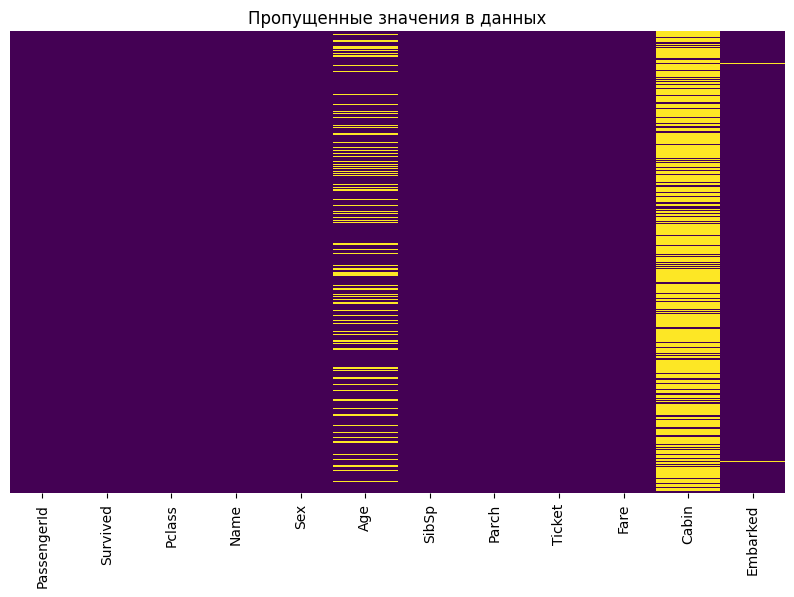

In [8]:
# Визуализация пропусков с помощью библиотеки seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(titanic.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Пропущенные значения в данных')
plt.show()

По сути для нас тут **важно** понять, сколько % пропусков у нас имеется в том или ином столбце. 

**Почему это важно?**

Обладая этой информацией, мы можем понять, стоит ли нам оставлять столбец с имеющимся количеством пропусков и попытаться восполнить недостающие пропуски или же от них стоит избавиться (удалить из нашей выборки).

## Шаг 3: Распределение переменных
На этом этапе важно проанализировать распределение каждой переменной, как числовой, так и категориальной.

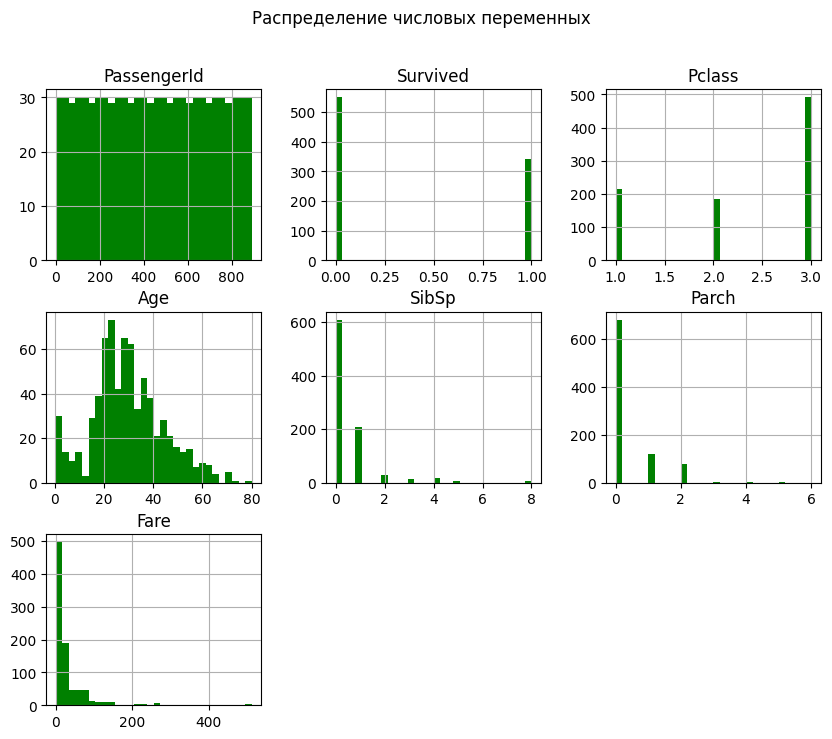

C:\Users\soyan\AppData\Local\Temp\ipykernel_1964\1563630453.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=titanic, palette='Set3')


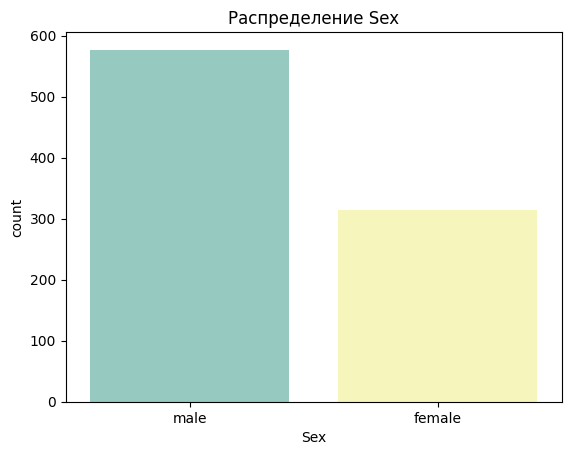

C:\Users\soyan\AppData\Local\Temp\ipykernel_1964\1563630453.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=titanic, palette='Set3')


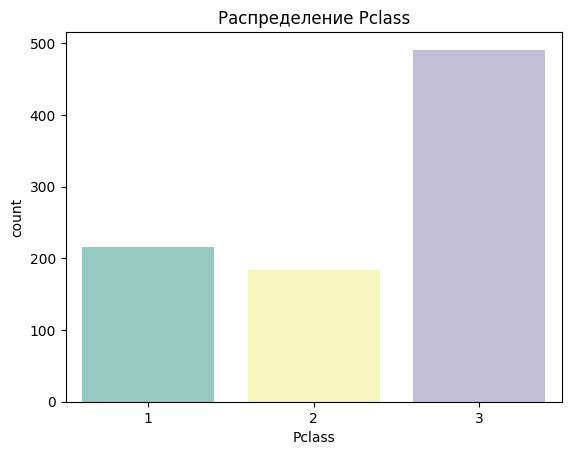

C:\Users\soyan\AppData\Local\Temp\ipykernel_1964\1563630453.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=titanic, palette='Set3')


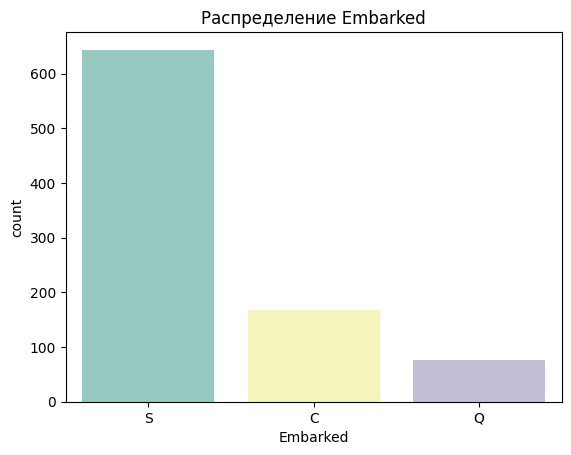

In [21]:
# Распределение числовых переменных
titanic.hist(bins=30, figsize=(10, 8), color='green')
plt.suptitle('Распределение числовых переменных')
plt.show()

# Распределение категориальных переменных
for column in ['Sex', 'Pclass', 'Embarked']:
    sns.countplot(x=column, data=titanic, palette='Set3')
    plt.title(f'Распределение {column}')
    plt.show()

## Шаг 4: Анализ выбросов и аномалий
Выбросы можно выявить с помощью диаграмм размаха (boxplots).

`Способ 1`. Можно посмотреть на анализ выбросов в определенных переменных, указав их конкретно

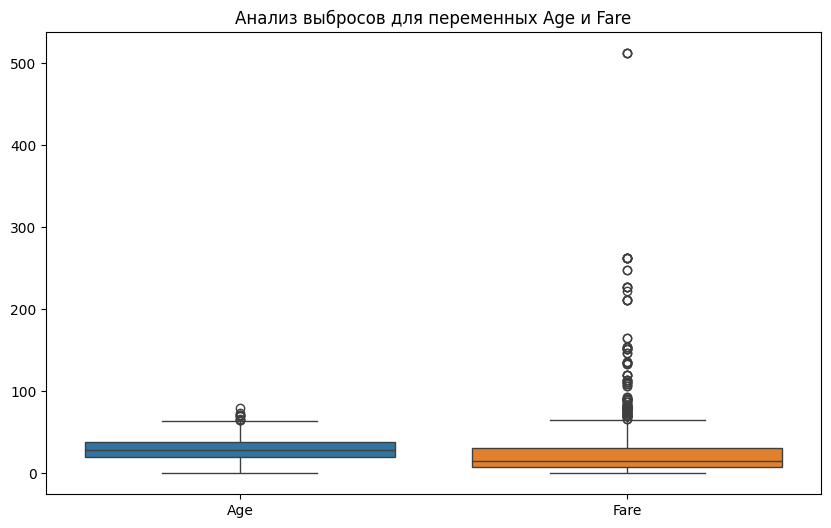

In [15]:
# Boxplot для выявления выбросов в переменных Age и Fare
plt.figure(figsize=(10, 6))
sns.boxplot(data=titanic[['Age', 'Fare']])
plt.title('Анализ выбросов для переменных Age и Fare')
plt.show()


`Способ 2`. Можно посмотреть на анализ выбросов во всех числовых переменных следующим образом:

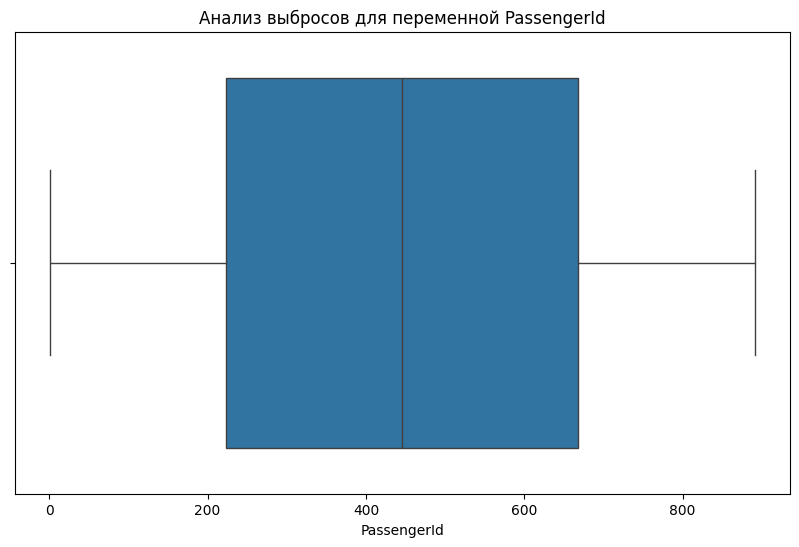

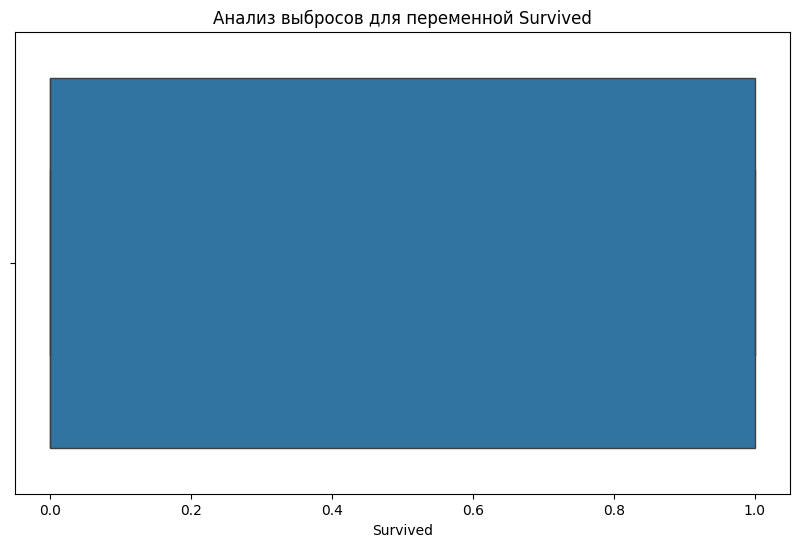

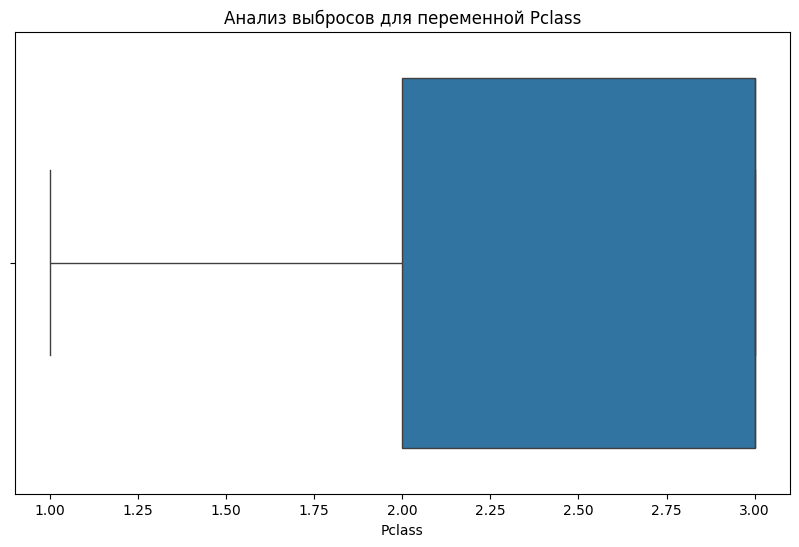

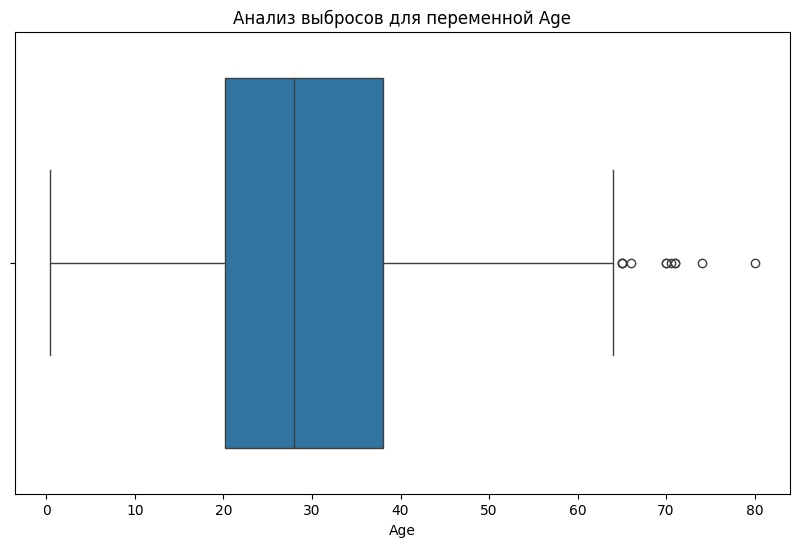

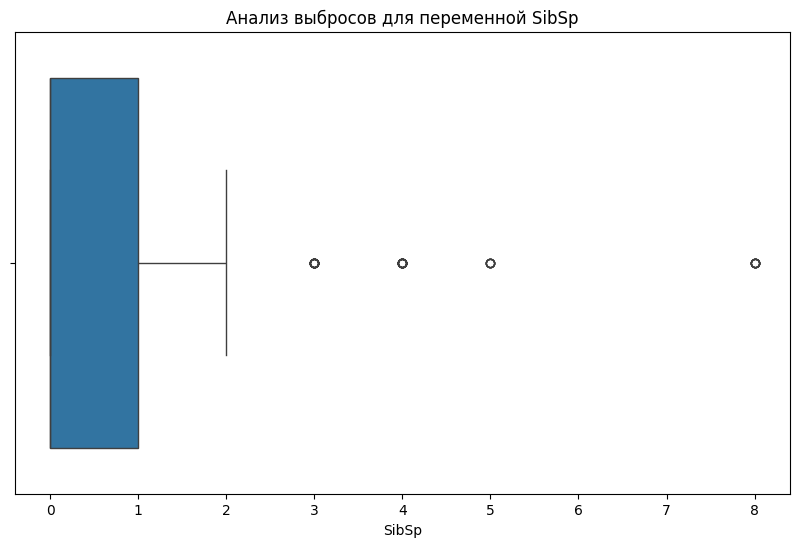

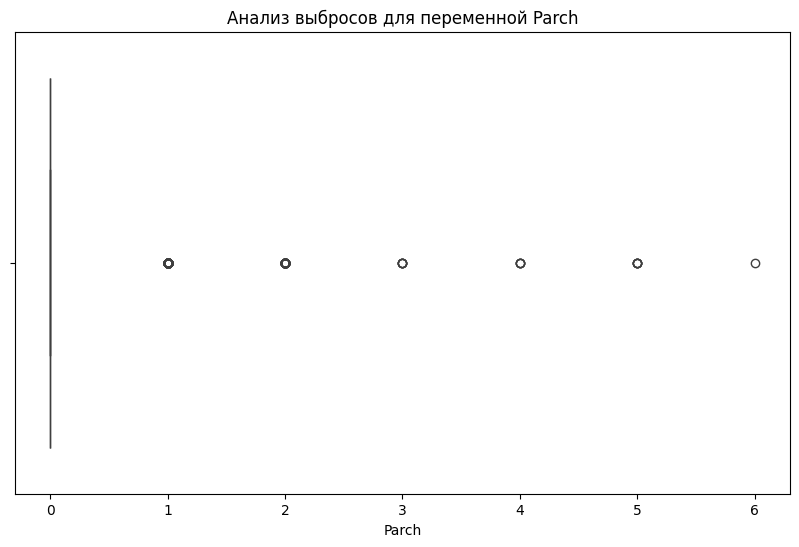

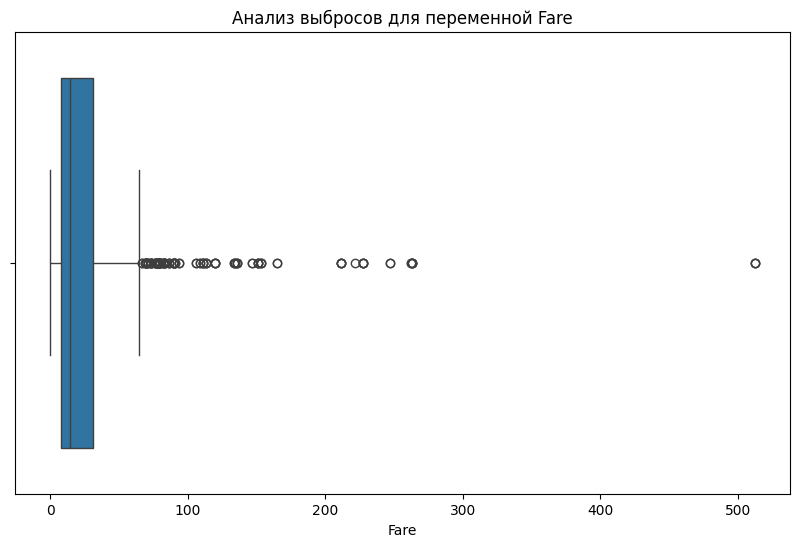

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_outliers(df):
    # Отбираем только числовые столбцы
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Построение boxplot для каждого числового столбца
    for column in numeric_columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df[column], orient='h')
        plt.title(f'Анализ выбросов для переменной {column}')
        plt.show()

# Анализ выбросов для всех числовых переменных
analyze_outliers(titanic)

## Шаг 5: Взаимосвязь между признаками

Чтобы понять, как признаки связаны между собой, строится корреляционная матрица. Это помогает выявить коррелирующие признаки, которые могут быть полезны для модели.

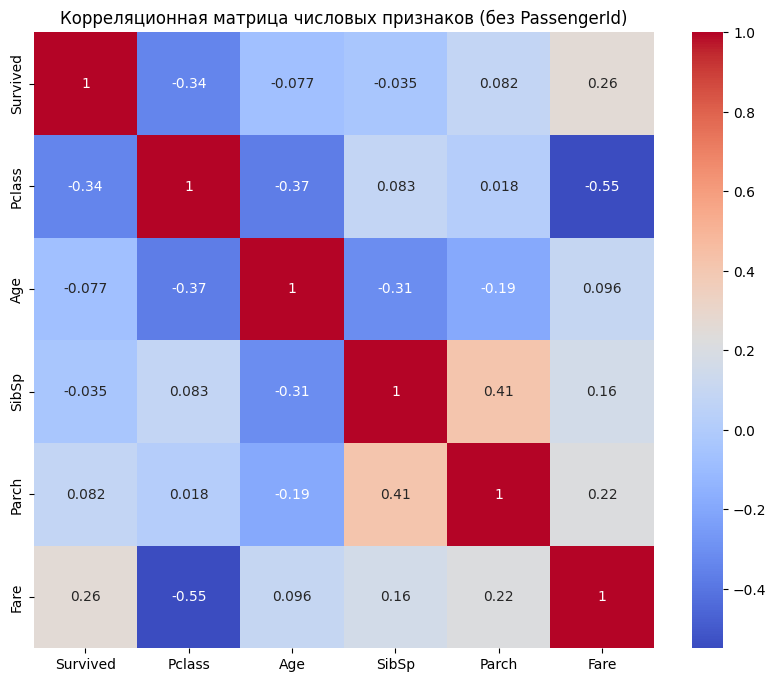

In [17]:
# Выбор только числовых признаков и удаление столбца PassengerId
numeric_cols = titanic.select_dtypes(include=['int64', 'float64']).drop(columns=['PassengerId'])

# Корреляционная матрица для числовых признаков
corr_matrix = numeric_cols.corr()

# Визуализация
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица числовых признаков (без PassengerId)')
plt.show()

**Выводы по матрице корреляции**:

1. Survived:

- Наблюдается слабая отрицательная корреляция между переменной Survived и классом пассажира (Pclass) (-0.34), что означает, что пассажиры с более низким классом обслуживания реже выживали.
- Остальные переменные (`Age`, `SibSp`, `Parch`, `Fare`) имеют очень слабую корреляцию с переменной Survived, что говорит о том, что они не сильно влияют на вероятность выживания.

2. Pclass:

- Умеренно сильная отрицательная корреляция между Pclass и Fare (-0.55), что ожидаемо: пассажиры более высокого класса обычно платили за билеты больше.
- Незначительная корреляция с другими переменными.

3. Age:

Практически отсутствует корреляция с другими переменными, что указывает на то, что возраст пассажиров не сильно связан с другими числовыми признаками.

4. SibSp и Parch:

Умеренная положительная корреляция между этими двумя признаками (0.41), что логично, так как наличие супругов или братьев/сестер часто связано с наличием детей или родителей на борту.

5. Fare:

Как упоминалось ранее, отрицательная корреляция с классом обслуживания пассажиров (Pclass).

**Важно помнить**, что удалять целевую переменную (target) из корреляционной матрицы не нужно, если целью анализа является понимание, как входные признаки (features) коррелируют с целевой переменной. Включение целевой переменной в матрицу корреляции позволяет увидеть, какие из признаков имеют сильную или слабую корреляцию с целевой переменной, что может помочь в выборе наиболее важных признаков для модели.

Например, если мы анализируем корреляцию между признаками и переменной Survived в датасете Titanic, включение этой переменной в корреляционную матрицу покажет, насколько такие признаки, как Age, Fare, и другие числовые данные, влияют на вероятность выживания.

Однако важно помнить, что высокая корреляция с целевой переменной не всегда означает, что этот признак полезен для модели (может быть проблема мультиколлинеарности).

`Мультиколлинеарность` — это явление, при котором две или более независимые переменные (признаки) сильно коррелируют друг с другом. Это может стать проблемой для некоторых моделей машинного обучения, таких как линейная регрессия, потому что это приводит к снижению точности оценки коэффициентов.

**Как проверить мультиколлинеарность**
Корреляционная матрица: Если корреляция между двумя признаками близка к 1 или -1, это признак сильной коллинеарности. Однако это может быть недостаточно для полной проверки мультиколлинеарности, так как корреляционная матрица только проверяет линейные зависимости между двумя переменными.

`Коэффициент инфляции дисперсии (Variance Inflation Factor, VIF)`. VIF — это более продвинутый метод для проверки мультиколлинеарности. VIF оценивает, насколько сильно одна переменная зависит от других переменных.

Значение VIF > 5 или 10 указывает на потенциальную проблему мультиколлинеарности (это зависит от конкретного контекста задачи).

Для этого нам сначала придется избавиться от пропусков, в качестве примера, просто удалю все строки с пропусками из датасета, но бездумно выполнять этот шаг в реальных условиях ни в коем случае нельзя. Выбор метода избавления от пропусков должен быть осознаным и соответствовать условию вашей задачи!

In [18]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Выбор только числовых признаков, исключая PassengerId и Survived (целевую переменную)
numeric_cols = titanic.select_dtypes(include=['int64', 'float64']).drop(columns=['PassengerId', 'Survived'])

# Удаление строк с пропусками
numeric_cols_cleaned = numeric_cols.dropna()

# Добавляем константу для вычисления VIF
X = sm.add_constant(numeric_cols_cleaned)

# Рассчитываем VIF для каждого признака
vif_data = pd.DataFrame()
vif_data["Признак"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,Признак,VIF
0,const,28.927673
1,Pclass,1.706840
2,Age,1.292372
3,SibSp,1.273264
4,Parch,1.229164
5,Fare,1.581994


**Вывод по значениям VIF**:
VIF для всех признаков находится значительно ниже критического значения 5, что говорит о том, что мультиколлинеарность между признаками отсутствует или минимальна.

Высокий VIF для константы (28.93) не является проблемой, так как он относится к константному столбцу, который добавляется для вычисления VIF в моделях с перехватом. Это значение не учитывается при анализе мультиколлинеарности между признаками.

**Общие выводы**:
1. По результатам корреляционной матрицы и анализа VIF можно сделать вывод, что признаков с высокой мультиколлинеарностью нет, а переменные имеют слабую корреляцию между собой.
2. Признаки, такие как `Pclass` и `Fare`, могут оказаться важными для построения модели, так как они демонстрируют умеренные взаимосвязи с целевой переменной `Survived`.

### Итог

EDA является необходимым этапом в анализе данных и разработке моделей машинного обучения. Основные задачи:

- Оценка и обработка пропусков.
- Выявление выбросов.
- Определение важнейших признаков (features) и их взаимосвязи с целевой переменной (target).
- Визуализация данных для лучшего понимания.

Понимание структуры данных позволяет лучше подготовить их к моделированию и принять правильные решения по выбору подходящих методов и моделей.